In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./sourceImages/W_A1_0_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

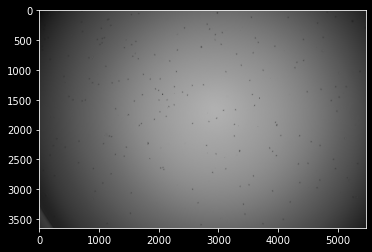

In [3]:
plt.imshow(img)

In [4]:
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

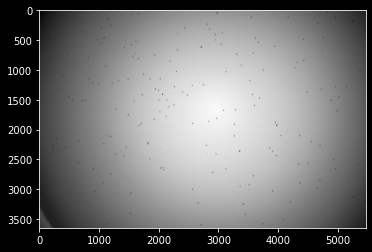

In [5]:
plt.imshow(grayImg, cmap='gray')

In [6]:
hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)

<BarContainer object of 255 artists>

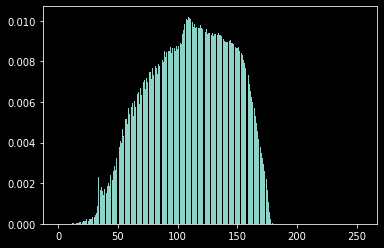

In [7]:
plt.bar(bin_edges[:-1], height=hist)

<BarContainer object of 255 artists>

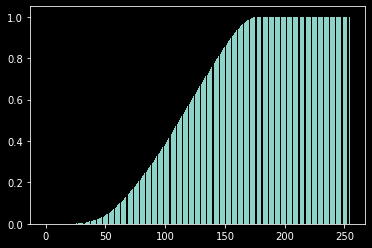

In [8]:
plt.bar(bin_edges[:-1], height=np.cumsum(hist))

In [9]:
newScale = 255 * np.cumsum(hist)
newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
newScale = newScale.astype(np.uint8)

In [10]:
newGrayImg = newScale[grayImg]

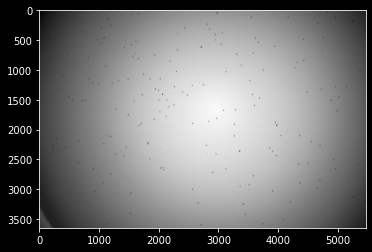

In [11]:
plt.imshow(grayImg, cmap='gray')

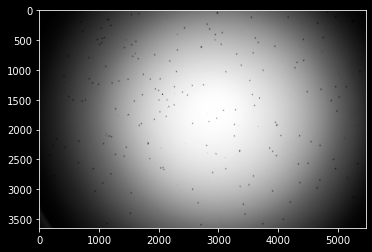

In [12]:
plt.imshow(newGrayImg, cmap='gray')

<BarContainer object of 255 artists>

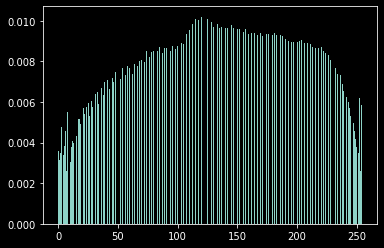

In [13]:
hist, bin_edges = np.histogram(newGrayImg.flatten(), bins=range(256), density=True)
plt.bar(bin_edges[:-1], height=hist)

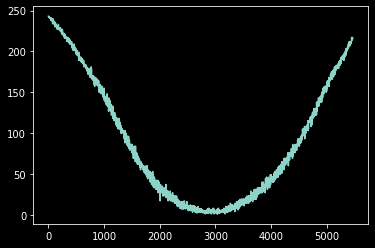

In [106]:
plt.plot(255-newGrayImg[2000, :])

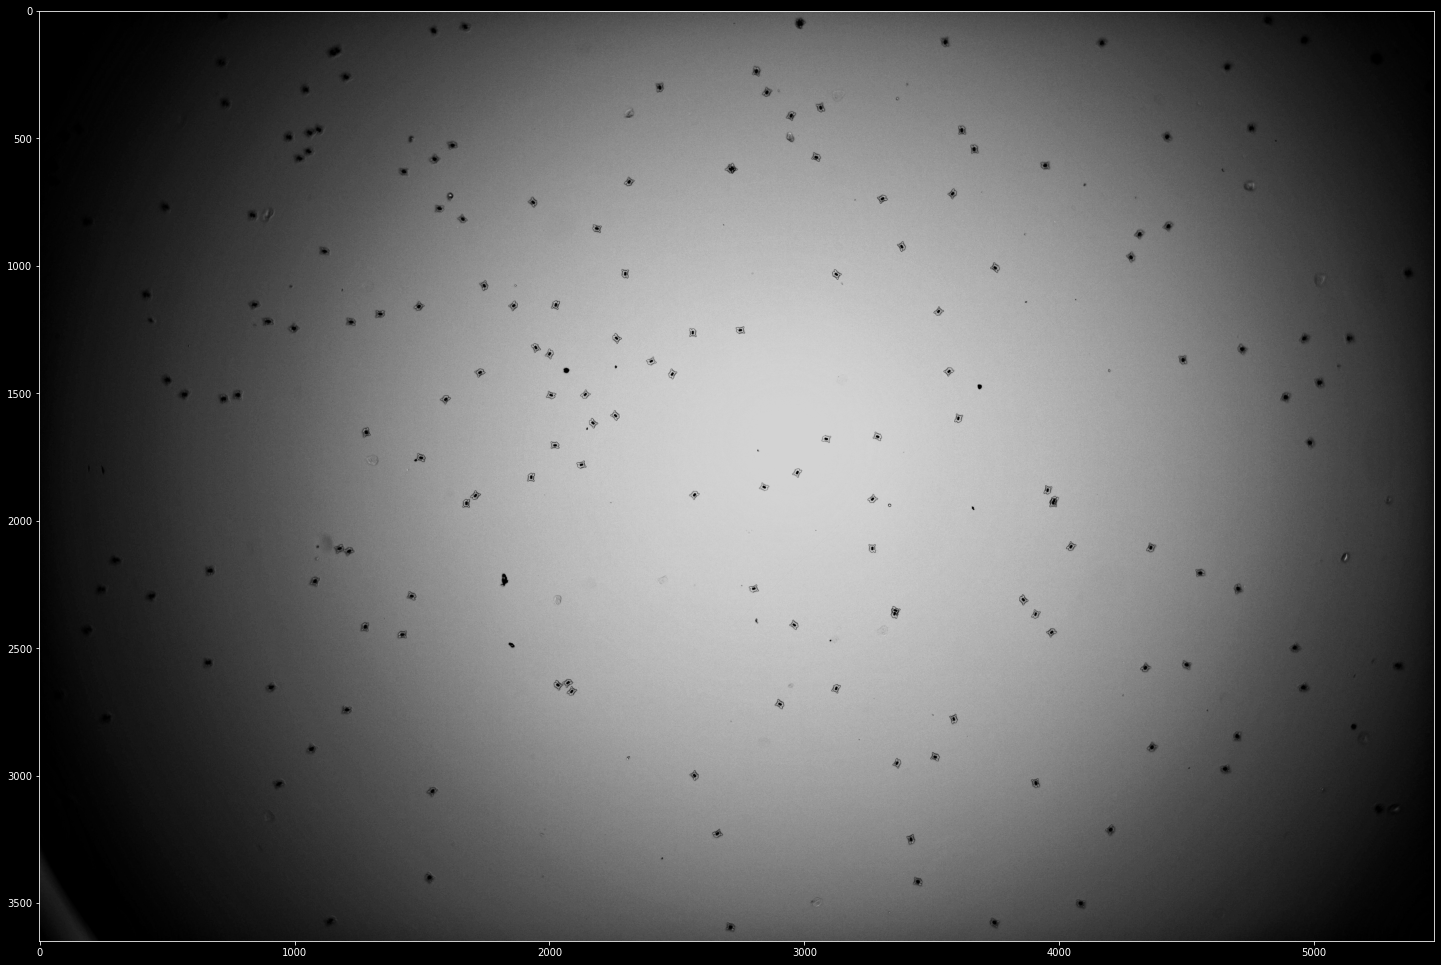

In [146]:
blur_img = cv2.GaussianBlur(newGrayImg, (0, 0), 100)
usm = cv2.addWeighted(newGrayImg, 1.5, blur_img, -0.8, 0)
plt.figure(figsize=(25,25))
plt.imshow(usm, cmap='gray')